<html style="background-color: white">
    <head style="background-color: white">
        <div style="position: relative; width: 1084px; margin: 50px auto; padding: 15px auto;">
            <figure style="max-width: 500px; float:left; padding: 10px; margin: 10px;">
                <a href="https://decide4ai.com/" target="_blank"><img style="padding: px; margin: 0;" src="./recursos/imagenes/FULLCOLOR.png" alt="logo decide"></a>
            </figure>
            <figure style="max-width: 500px; float:left; padding: 10px; margin: 32px 10px 10px 10px;">
                <a href="https://t3chfest.es/2023/" target="_blank"><img style="padding: 0; margin: 0;" src="./recursos/imagenes/t3f_logo.png" alt="logo t3ch festival"></a>
            </figure>
        </div>
        <div style="position: relative; border-top:3px solid #002060; border-bottom:3px solid #002060; margin-top: 300px; height: 96px; margin-right: auto; margin-left: auto;">
            <a href="./u1c3.ipynb" target="_blank"><img style="float: left; height: 64px; width: 76px;  margin:1% 1% 1% 7%;" src="./recursos/imagenes/ICON-FULLCOLOR-ROT.png" alt="icono decide4ai rotado"></a>
            <h1 style="color: #002060; text-align: center; margin: 2% 0; padding: 0; width: 70%; float: left;">
                <a href="./u1.ipynb" style="color: #002060">Unidad 1: Introducción a motores de recomendación</a><br><a href="./indice.ipynb" style="font-size: 10px; color: #bf27b8">Volver al índice</a>
            </h1>
            <a href="./u1c5.ipynb" target="_blank"><img style="float: left; height: 64px; width: 76px; margin:1% auto 1% 1%;" src="./recursos/imagenes/ICON-FULLCOLOR.png" alt="icono decide4ai"></a>
        </div>
        <ol style="text-align: left; list-style-type: none; margin-top: 75px;">
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c1.ipynb" target="_blank">¿Qué es un motor de recomendación?</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c2.ipynb" target="_blank">Entendiendo los datos.</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c3.ipynb" target="_blank">¿Qué tipos de motores de recomendación existen?</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #fc5100" href="./u1c4.ipynb" target="_blank"><strong>¿Cómo defino el objetivo de un motor de recomendación y con qué problemas me puedo encontrar?</strong></a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c5.ipynb" target="_blank">¿Qué métricas uso para un motor de recomendación?</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c6.ipynb" target="_blank">¿Cómo pongo en producción un motor de recomendación?</a></h5></li>
        </ol>
    </head>
    <body>
        <h1 style="color: #fc5100; margin-top: 100px;">¿Cómo defino el objetivo de un motor de recomendación y con qué problemas me puedo encontrar?</h1>
        <p style="font-size: 18px; color: #002060;">
            Vamos a empezar hablando de los problemas, o limitaciones, y comprobando en nuestro dataset si sufrimos de alguna. Las limitaciones más comunes que se pueden encontrar en este tipo de algoritmos son: <strong>data sparsity</strong>, <strong>escalabilidad</strong>, <strong>arranque en frío</strong> o <em>cold start</em>, <strong>privacidad</strong>, <em style="font-weight: bold;">grey sheep problem</em> y <strong>productos sinónimos</strong>.
        </p>
        <h2 style="color: #f47b4c; margin-top: 100px;">Limitaciones I: <em>Sparsity</em>.</h2>
        <p style="font-size: 18px; color: #002060;">
            Para entender el concepto de matriz o dataset <em>sparse</em> vamos a ver su contrario, que es que una matriz o dataset sea denso. Esto es que, en este contexto, el comportamiento entre usuarios y productos esté poblado. Es decir, que los usuarios pongan un me gusta o no me gusta a las películas de Netflix por ejemplo; o que un usuario se interese por muchos productos de una tienda a través de los clicks que da en el producto.<br>
            Una matriz de <em>user-item</em> densa nos permite conocer muy bien los gustos de los usuarios y gracias a ellos nos permite realizar mejores recomendaciones.
        </p>
        <p style="font-size: 18px; color: #002060;">
            Por el contrario, tener una matriz <em>sparse</em> es que los usarios no interaccionan mucho con el catálogo de productos. Un ejemplo sería disponer de un catálogo de 10K de productos y que todos los usuarios iteraccionen solo con el 1% del catálogo. Esto provoca que no se conozca bien el comportamiento de los usuarios y que no puedas realizar buenas recomendaciones.
        </p>
        <div style="position:relative; width: 400px; margin: 0 auto; padding: 0 auto;">
            <figure style="width: 400px; height: 200px; float:left; padding: 0 4px; margin: 0; text-align: center; color: #002060;">
                <img style="padding: px; margin: 0;" src="./recursos/imagenes/user-item-matrix.png" alt="user item matrix">
                <figcaption>Formato de la matriz <em>user-item</em> MxN.</figcaption>
            </figure>
        </div>
    </body>
</html>

In [1]:
import tools
import numpy as np
import pandas as pd

In [2]:
configuration = tools.read_config_data()
dtypes_transactions = configuration.get("DTYPES_TRANSACTIONS")
dtypes_transactions = {
    key: eval(value) if value.startswith("np") else value for key, value in dtypes_transactions.items()
}
path_transactions = "./recursos/datos/transactions_train.csv"
transactions = pd.read_csv(path_transactions, dtype=dtypes_transactions)
trans_nrows, trans_ncols = transactions.shape

In [3]:
# STUDENT-CODE

# Calcula el sparsity de la matriz user-item. Para ello
# calcula primero la cantidad de usuarios únicos y de productos
# únicos que hay en el dataframe "transactions".
m_num_customers = transactions["customer_id"].nunique()
n_num_articles = transactions["article_id"].nunique()

# Queremos calcular la sparsity, así pues vamos a eliminar aquellos
# productos que el usuarios haya comprado varias veces.
temp = transactions.drop_duplicates(subset=["customer_id", "article_id"])

# A partir de ahí vamos a calcular una proporción de celdas llenas.
# Si imaginamos la matriz user-item como la de la imagen anterior,
# el total de celdas es el producto del número de clientes por la 
# cantidad de items.
total_cells = m_num_customers * n_num_articles

# Calculamos ahora la proporción de celdas rellenas.
filled_cells = temp.shape[0]
filled_proportion = filled_cells/total_cells
sparsity = 1 - filled_proportion
print(f"Hay un total de {m_num_customers:,} clientes y {n_num_articles:,} artículos. Esto es un total de {total_cells:,} celdas en la matriz.")
print(f"De todas esas celdas, se tienen únicamente interacción para un {round(100 * filled_proportion, 4)}%. Lo que es una sparsity del {round(100 * sparsity, 4)}%.")

Hay un total de 1,362,281 clientes y 104,547 artículos. Esto es un total de 142,422,391,707 celdas en la matriz.
De todas esas celdas, se tienen únicamente interacción para un 0.0192%. Lo que es una sparsity del 99.9808%.


<h2 style="color: #f47b4c; margin-top: 100px;">Limitaciones II: <em>Cold Start</em>.</h2>
<p style="font-size: 18px; color: #002060;">
    Para ejemplificar este problema, supongamos que se tiene un modelo de ML de clasificación de lo que sea. Se entrena el modelo y luego se predicen las etiquetas de los nuevos registros. Hasta aquí:
</p>
<div style="position:relative; width: 400px; margin: 0 auto; padding: 0 auto;">
    <figure style="width: 400px; height: 200px; float:left; padding: 0 4px; margin-top: 0px; margin-bottom: 100px; text-align: center; color: #002060;">
        <img style="padding: px; margin: 0;" src="./recursos/imagenes/milhouse.gif" alt="todo sale a pedir de milhouse gif">
    </figure>
</div>
<p style="font-size: 18px; color: #002060; margin-top: 400px">
    Pero imagina que cada día te llegan etiquetas nuevas. Esto significaría que tu modelo anterior ya no funciona. Tendrías que entrenar el modelo con las nuevas etiquetas.
</p>
<div style="position:relative; width: 350px; margin: 0 auto; padding: 0 auto;">
    <figure style="width: 400px; height: 200px; float:left; padding: 0 4px; margin: 0; text-align: center; color: #002060;">
        <img style="padding: px; margin: 0;" src="./recursos/imagenes/ralph.gif" alt="momento donde a ralph se le rompe el corazon gif">
    </figure>
</div>
<p style="font-size: 18px; color: #002060; margin-top: 270px">
    Pues esto mismo es el <em>cold start problem</em>. En este caso, si no tienes un histórico de un cliente, no puedes saber a quién se parece ese cliente. O si por ejemplo llega un producto nuevo que nadie ha comprado, tampoco se puede saber a priori a qué otros productos se puede parecer. Esto es porque se carece de esa interacción.
</p>

In [5]:
dtypes_articles = configuration.get("DTYPES_ARTICLES")
dtypes_customers = configuration.get("DTYPES_CUSTOMERS")

dtypes_articles = {
    key: eval(value) if value.startswith("np") else value for key, value in dtypes_articles.items()
}
dtypes_customers = {
    key: eval(value) if value.startswith("np") else value for key, value in dtypes_customers.items()
}

path_articles = "./recursos/datos/articles.csv"
path_cutomers = "./recursos/datos/customers.csv"

customers = pd.read_csv(path_cutomers, dtype=dtypes_customers)
articles = pd.read_csv(path_articles, dtype=dtypes_articles)

In [6]:
# STUDENT-CODE

# ¿Hay diferencias entre el número de clientes (artículos) en la matriz de user-item
# y el número de clientes (artículos) registrados?
n_customers_registered = customers["customer_id"].nunique()
n_products_registered = articles["article_id"].nunique()

print(f"Hay {n_customers_registered - m_num_customers:,} clientes sin histórico.")
print(f"\t Esto es un {round(100 * (n_customers_registered - m_num_customers)/n_customers_registered, 4)}% del total de los clientes.")
print(f"Hay {n_products_registered - n_num_articles:,} productos sin histórico.")
print(f"\t Esto es un {round(100 * (n_products_registered - n_num_articles)/n_products_registered, 4)}% del total de los productos.")

Hay 9,699 clientes sin histórico.
	 Esto es un 0.7069% del total de los clientes.
Hay 995 productos sin histórico.
	 Esto es un 0.9428% del total de los productos.


<h2 style="color: #f47b4c; margin-top: 100px;">Limitaciones III: Escalabilidad.</h2>
<p style="font-size: 18px; color: #002060;">
    El <em>Cold Start</em> es un problema para los clientes o los productos nuevos. En este caso la escalabilidad es algo similar pero desde el punto de vista de nuevas interacciones.<br>
    Cada vez que un cliente hace algo nuevo, es necesario que se actualice la información con ese nuevo comportamiento. Sin embargo, hay que tener en cuenta también que a medida que se aumenta el número de interacciones, la matriz <em>user-item</em> se hace computacionalmente más compleja.
</p>

<h3 style="color: #1cb890; margin-top: 25px;">Clientes.</h3>

In [7]:
from matplotlib import pyplot as plt

In [8]:
# ¿Cuál es la distribución de productos (unicos) que compran los clientes?
# O lo que es lo mismo, ¿cuál es la distribución de clientes que más compran?
# Realiza un sample de 5 clientes para ver cuántos productos han comprado
# y llama a la columna número de artículos como "n_articles"
active_users = transactions.groupby(["customer_id"], as_index=False)["article_id"].nunique()
active_users = active_users.rename(columns={"article_id": "n_articles"})
active_users.sample(n=5)

,customer_id,n_articles
995914,37f910114003074e3b0b07f16161f495f996b59e41b11b...,1
499,02c13bb5a2502db80d1f18b7db8ac0e250df329ba2b4aa...,82
1176721,c593346b8e0906557439f1e2389273cf5bd4bc7a5af14f...,1
988530,ea6f5d94dc8b0f3e593f8464cff617c976e8c3eb87444b...,1
295679,ebc3fa91ab390a219bb2503e605444c549b1b88a597903...,105


In [9]:
# ¿Cuál es la media y la mediana de compras de un cliente?
active_users_mean = active_users["n_articles"].mean()
active_users_median = active_users["n_articles"].median()
print(f"La media de artículos que compran los clientes es {round(active_users_mean, 4):,}. Mientras que la mediana es {active_users_median:,}.")

La media de artículos que compran los clientes es 20.0446. Mientras que la mediana es 8.0.


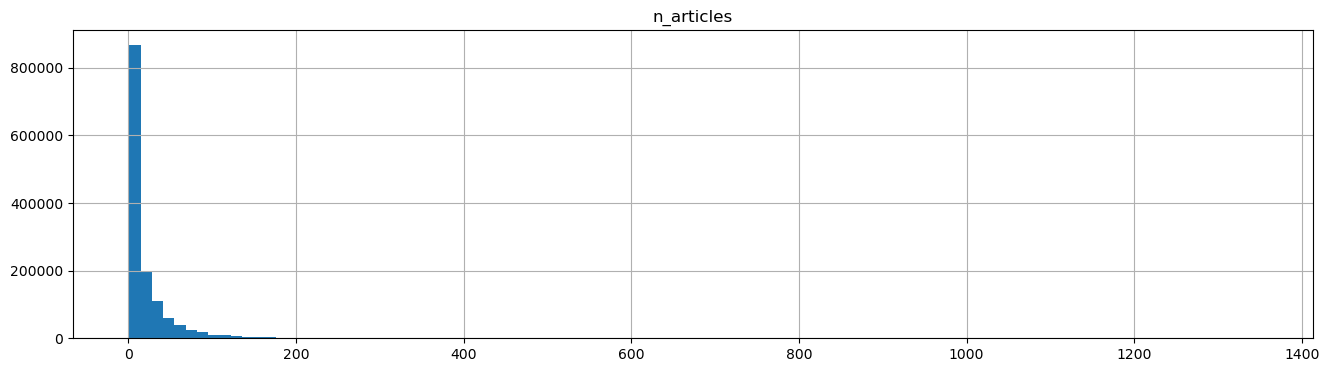

In [10]:
# ¿Cuál es la distribución?
active_users.hist(bins=100, column="n_articles", figsize=(16, 4));

In [11]:
# Si hacemos el .describe() de la variable "n_articles" se obtiene lo siguiente
active_users["n_articles"].describe().apply(lambda x: format(x, "f"))

count    1362281.000000
mean          20.044645
std           31.980251
min            1.000000
25%            3.000000
50%            8.000000
75%           24.000000
max         1346.000000
Name: n_articles, dtype: object

In [12]:
# Ordena los clientes de más activos a menos.
active_users = active_users.sort_values(by="n_articles", ascending=False)

# Calcula el pct que corresponde a cada usuario sobre el total de productos vendidos.
active_users["pct"] = 100 * active_users["n_articles"] / active_users["n_articles"].sum()

# Calcula el sumatorio acumulado del pct para filtrar por clientes
active_users["cs"] = np.cumsum(active_users["pct"])

# ¿Cuántos clientes están en el top 20% de las compras?
top_users = active_users[active_users["cs"] <= 20].shape[0]

pct = round(100 * top_users/active_users["customer_id"].nunique(), 5)
print(f"Un {pct}% de clientes se encuentran en el top 20%. Con un total de {top_users:,} usuarios.")

Un 2.46065% de clientes se encuentran en el top 20%. Con un total de 33,521 usuarios.


In [13]:
# ¿Qué cantidad de usuarios han comprado 2 artículos o menos?
users = active_users[active_users["n_articles"] <= 2].shape[0]

pct = round(100 * users/active_users["customer_id"].nunique(), 5)
print(f"Un {pct}% de clientes han comprado 2 artículos o menos. Con un total de {users:,} usuarios.")

Un 21.12134% de clientes han comprado 2 artículos o menos. Con un total de 287,732 usuarios.


<h3 style="color: #1cb890; margin-top: 25px;">Artículos.</h3>

In [14]:
# ¿Cuáles son los artículos más vendidos? (Si un usuario ha comprado un artículo dos veces
# no lo cuentes). Realiza un sample de 5 productos para ver cuántas veces se ha comprado un artículo
# y llama a la columna "n_times"
ms_articles = transactions.groupby(["article_id"], as_index=False)["customer_id"].nunique()  # ms -> Most Seller
ms_articles = ms_articles.rename(columns={"customer_id": "n_times"})
ms_articles.sample(n=5)

,article_id,n_times
64402,0768998001,117
4733,0564312012,32
57411,0722174001,921
90005,0883544001,122
10605,0628816001,596


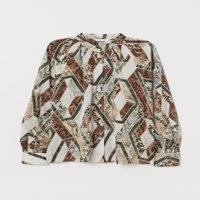

In [15]:
tools.show_article(article_id="0789303003")

In [16]:
# ¿Cuál es la media y la mediana de ventas de un artículo?
ms_articles_mean = ms_articles["n_times"].mean()
ms_articles_median = ms_articles["n_times"].median()
print(f"De media, los artículos se compran {round(ms_articles_mean, 4):,} veces. Mientras que la mediana es {ms_articles_median:,}.")

De media, los artículos se compran 261.1882 veces. Mientras que la mediana es 58.0.


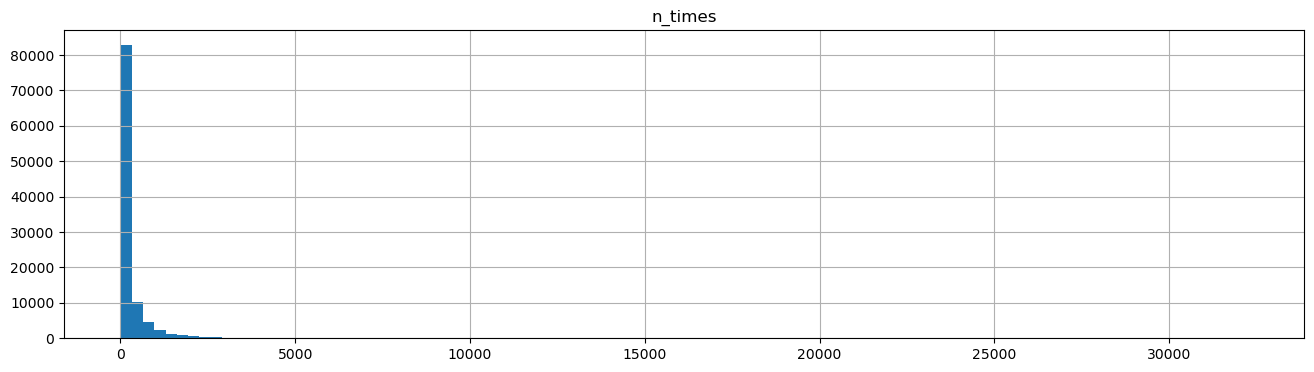

In [17]:
# ¿Cuál es la distribución de los artículos que se compran?
ms_articles.hist(bins=100, column="n_times", figsize=(16, 4));

In [18]:
# Si hacemos el .describe() de la variable "n_times" se obtiene lo siguiente
ms_articles["n_times"].describe().apply(lambda x: format(x, "f"))

count    104547.000000
mean        261.188164
std         637.906882
min           1.000000
25%          12.000000
50%          58.000000
75%         250.000000
max       32251.000000
Name: n_times, dtype: object

In [19]:
# Ordena los artículos de más vendidos a menos.
ms_articles = ms_articles.sort_values(by="n_times", ascending=False)

# Calcula el pct que corresponde a cada articulo sobre el total de productos vendidos.
ms_articles["pct"] = 100 * ms_articles["n_times"] / ms_articles["n_times"].sum()

# Calcula el sumatorio acumulado del pct para filtrar por articulos
ms_articles["cs"] = np.cumsum(ms_articles["pct"])

# ¿Cuántos artículos están en el top 20% de las compras?
top_articles = ms_articles[ms_articles["cs"] <= 20].shape[0]

pct = round(100 * top_articles/ms_articles["article_id"].nunique(), 5)
print(f"Un {pct}% de artículos se encuentran en el top 20%. Con un total de {top_articles:,} artículos.")

Un 1.25972% de artículos se encuentran en el top 20%. Con un total de 1,317 artículos.


In [20]:
# ¿Qué cantidad de artículos han sido comprados 2 veces o menos?
art = ms_articles[ms_articles["n_times"] <= 2].shape[0]

pct = round(100 * art/ms_articles["article_id"].nunique(), 5)
print(f"Un {pct}% de artículos han sido comprados 2 veces o menos. Con un total de {art:,} artículos.")

Un 7.78502% de artículos han sido comprados 2 veces o menos. Con un total de 8,139 artículos.


<h3 style="color: #1cb890; margin-top: 25px;">Perímetro.</h3>
<p style="font-size: 18px; color: #002060;">
    Como tal, esto que se acaba de ver aquí no es un problema de escalabilidad. Esto es porque estos problemas vienen cuando se añaden productos nuevos o cuando llegan usuarios nuevos que hagan que la matriz <em>user-item</em> sea más compleja. Sin embargo, sabiendo que de lo que se trata es de recomendar, ¿qué se va a poder recomendar a un usuario que solo ha comprado un artículo? o ¿a qué artículos se van a parecer un producto dado, si este solo se ha comprado una vez?<br>
    Esto es también un problema de escalabilidad que se tiene que tener en cuenta para definir el perímetro del motor de recomendación.
</p>

In [21]:
import plotly.io as pio
from plotly import graph_objects as go

pio.renderers.default = "iframe"

In [22]:
# Vamos a reducir el perímetro de usuarios y de productos sobre los cuáles se van a buscar similitudes.
# Obtén solo los artículos que se encuentren en el top 20% de ventas.
filter_products = ms_articles[(ms_articles["cs"] <= 20)]["article_id"].tolist()

# Aplica el filtro
transactions_f1 = transactions[transactions["article_id"].isin(filter_products)]

trans_nrows_f1, trans_ncols_f1 = transactions_f1.shape
m_num_customers_f1 = transactions_f1["customer_id"].nunique()
n_num_articles_f1 = transactions_f1["article_id"].nunique()

In [23]:
# Al reducir el numero de artículos puede ocurrir que un usuario ahora parezca que
# no ha comprado ningún item. Compruébalo.
ixu = transactions_f1.groupby(["customer_id"], as_index=False)["article_id"].nunique()
ixu = ixu.rename(columns={"article_id": "num_articles"})
ixu["num_articles"].describe().apply(lambda x: format(x, "f"))

count    1362281.000000
mean           4.007417
std            6.205969
min            0.000000
25%            0.000000
50%            2.000000
75%            5.000000
max          174.000000
Name: num_articles, dtype: object

In [24]:
# Obtén de nuevo la distribución de clientes que más compran.
active_users_f1 = transactions_f1.groupby(["customer_id"], as_index=False)["article_id"].nunique()
active_users_f1 = active_users_f1.rename(columns={"article_id": "n_articles"})

# Ordena los clientes de más activos a menos.
active_users_f1 = active_users_f1.sort_values(by="n_articles", ascending=False)

# Calcula el pct que corresponde a cada usuario sobre el total de productos vendidos.
active_users_f1["pct"] = 100 * active_users_f1["n_articles"] / active_users_f1["n_articles"].sum()

# Calcula el sumatorio acumulado del pct para filtrar por clientes
active_users_f1["cs"] = np.cumsum(active_users_f1["pct"])

# Obten solo los clientes que se encuentren en el top 20% de ventas.
filter_users = active_users_f1[(active_users_f1["cs"] <= 20)]["customer_id"].tolist()

# Aplica el filtro
transactions_f2 = transactions_f1[transactions_f1["customer_id"].isin(filter_users)]

trans_nrows_f2, trans_ncols_f2 = transactions_f2.shape
m_num_customers_f2 = transactions_f2["customer_id"].nunique()
n_num_articles_f2 = transactions_f2["article_id"].nunique()

In [25]:
fig = go.Figure()
fig.add_trace(
    go.Funnel(
        name="Transactions rows",
        y=["Init", "After items filter", "After user filter"],
        x=[trans_nrows, trans_nrows_f1, trans_nrows_f2],
        textposition="inside",
        textinfo="value+percent initial+percent previous",
        hoverinfo="none",
        marker={"color": "#67fbb4"},
    )
)
fig.update_layout(
    title="Transactions rows",
    font=dict(
        size=12,
    )
)
fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(
    go.Funnel(
        name="M users",
        y=["Init", "After items filter", "After user filter"],
        x=[m_num_customers, m_num_customers_f1, m_num_customers_f2],
        textposition="inside",
        textinfo="value+percent initial+percent previous",
        hoverinfo="none",
        marker={"color": "#7b5bc7"},
    )
)
fig.update_layout(
    title="M users",
    font=dict(
        size=12,
    )
)
fig.show()

In [27]:
fig = go.Figure()
fig.add_trace(
    go.Funnel(
        name="N items",
        orientation="h",
        y=["Init", "After items filter", "After user filter"],
        x=[n_num_articles, n_num_articles_f1, n_num_articles_f2],
        textposition="inside",
        textinfo="value+percent initial+percent previous",
        hoverinfo="none",
        marker={"color": "#f58c6a"},
    )
)
fig.update_layout(
    title="N items",
    font=dict(
        size=12,
    )
)
fig.show()

In [28]:
# Calcula el sparsity de la matriz user-item tras el primer filtrado
filled_cells_f1 = transactions_f1.drop_duplicates(subset=["customer_id", "article_id"]).shape[0]
total_cells_f1 = m_num_customers_f1 * n_num_articles_f1
filled_proportion_f1 = filled_cells_f1/total_cells_f1
sparsity_f1 = 1 - filled_proportion_f1
print(f"Hay un total de {m_num_customers_f1:,} clientes y {n_num_articles_f1:,} articulos. Esto es un total de {total_cells_f1:,} celdas en la matriz.")
print(f"De todas esas celdas, se tienen únicamente interacción para un {round(100 * filled_proportion_f1, 4)}%. Lo que es una sparsity del {round(100 * sparsity_f1, 4)}%.")

Hay un total de 947,577 clientes y 1,317 articulos. Esto es un total de 1,247,958,909 celdas en la matriz.
De todas esas celdas, se tienen únicamente interacción para un 0.4375%. Lo que es una sparsity del 99.5625%.


In [29]:
# Calcula el sparsity de la matriz user-item tras el segundo filtrado
filled_cells_f2 = transactions_f2.drop_duplicates(subset=["customer_id", "article_id"]).shape[0]
total_cells_f2 = m_num_customers_f2 * n_num_articles_f2
filled_proportion_f2 = filled_cells_f2/total_cells_f2
sparsity_f2 = 1 - filled_proportion_f2
print(f"Hay un total de {m_num_customers_f2:,} clientes y {n_num_articles_f2:,} articulos. Esto es un total de {total_cells_f2:,} celdas en la matriz.")
print(f"De todas esas celdas, se tienen únicamente interacción para un {round(100 * filled_proportion_f2, 4)}%. Lo que es una sparsity del {round(100 * sparsity_f2, 4)}%.")

Hay un total de 36,816 clientes y 1,317 articulos. Esto es un total de 48,486,672 celdas en la matriz.
De todas esas celdas, se tienen únicamente interacción para un 2.2518%. Lo que es una sparsity del 97.7482%.


In [30]:
transactions_f2["customer_id"] = transactions_f2["customer_id"].astype(str)
transactions_f2["article_id"] = transactions_f2["article_id"].astype(str)

transactions_f2["count"] = transactions_f2.groupby(["customer_id", "article_id"]).transform("size")

C:\Users\Rafael Tomé\AppData\Local\Temp\ipykernel_25996\1102269205.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rafael Tomé\AppData\Local\Temp\ipykernel_25996\1102269205.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rafael Tomé\AppData\Local\Temp\ipykernel_25996\1102269205.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [31]:
user_item_matrix = pd.pivot_table(
    data=transactions_f2, values="count", index="customer_id", columns="article_id", fill_value=0
)

In [32]:
user_item_matrix

article_id,0108775015,0108775044,0111565001,0111586001,0111593001,0120129001,0123173001,0148033001,0153115019,0153115020,...,0879248001,0879781003,0880839001,0882888002,0883024001,0883033001,0883033002,0915526001,0916468003,0918292001
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00023e3dd8618bc63ccad995a5ac62e21177338d642d66b42e0038c6b10f655a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000ed4cabda96069b547ae531c66de5f1bf6a7e5b83aa8ecc5abe84a9f6779e0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,0,3,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0010e8eb18f131e724d6997909af0808adbba057529edb1523944f7d4e02b4ce,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff7e7674509592818bf453391af43a85eaaac9a52d8587c886a603aeeb7df64,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fff7f145e356557541af211bb11aa9d78d7edf51bd3c4033830eaf1a188ebf2f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffae8eb3a282d8c43c77dd2ca0621703b71e90904dfde2189bdd644f59071dd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
transactions_f2[
    ["t_dat", "customer_id", "article_id", "price", "sales_channel_id"]
].to_csv("./recursos/datos/transactions_small.csv", index=False)

<h2 style="color: #f47b4c; margin-top: 100px;">Limitaciones IV: Privacidad.</h2>
<p style="font-size: 18px; color: #002060;">
    Un usuario puede ser reticente a dar sus datos si no ve un beneficio directo. Por lo que las recomendaciones personales van a ser más complejas atacarlas y se tendrá que optar más por otro tipo de vías para recomendar a estos usuarios. Como por ejemplo, recomendar por popularidad.
</p>

<h2 style="color: #f47b4c; margin-top: 100px;">Limitaciones V: <em>Grey sheep problem</em>.</h2>
<p style="font-size: 18px; color: #002060;">
    Este tipo de problemas se refiere a personas cuyas opiniones son dispares a las del resto y no se llegan a beneficiar de un filtrado colaborativo. Este tipo de personas hay que detectarlas y recomendarles por separado.
</p>
<h2 style="color: #f47b4c; margin-top: 100px;">Limitaciones VI: Productos sinónimos.</h2>
<p style="font-size: 18px; color: #002060;">
    Este tipo de problemas está relacionado con los productos. Si dos productos se parecen mucho, se va a tender a recomendar ese, pero esto no siempre puede ser beneficioso. Por ejemplo si se ha comprado un pantalón negro, aunque pueda parecer lógico que el mismo pantalón en azul gustará, puede que tenga más sentido recomendar una camiseta al gusto de la elección del pantalón.
</p>
<h2 style="color: #f47b4c; margin-top: 100px;">¿Cómo defino el objetivo de un motor de recomendación?</h2>
<p style="font-size: 18px; color: #002060;">
    El objetivo de un motor de recomendación se define en función de como se quiera atacar el problema de recomendar. Es decir, a medida que se tiene más información de una persona, más complejo puede ser el algoritmo.
</p>
<p style="font-size: 18px; color: #002060;">
    Es por eso que para fijar un objetivo, hay que tener en cuenta todos los problemas anteriores para acabar recomendando de la mejor manera posible a todas las personas y sobre todos los productos. Por ejemplo, enviar recomendaciones provenientes de diferentes motores de recomendación (algoritmos) en función de cómo esté el usuario consumiendo el producto.
</p>
<p style="font-size: 18px; color: #002060;">
    El objectivo de este taller es enseñar diferentes algoritmos y como funcionan cada uno con el perímetro de datos elegido.
</p>